In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [9]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder=LabelEncoder()
df['Genre']=encoder.fit_transform(df['Genre'])

In [11]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [27]:
scaler=StandardScaler()
scaled_df=pd.DataFrame(scaler.fit_transform(df[df.columns]), columns=df.columns)
scaled_df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [28]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# 1.Clustering using KMeans

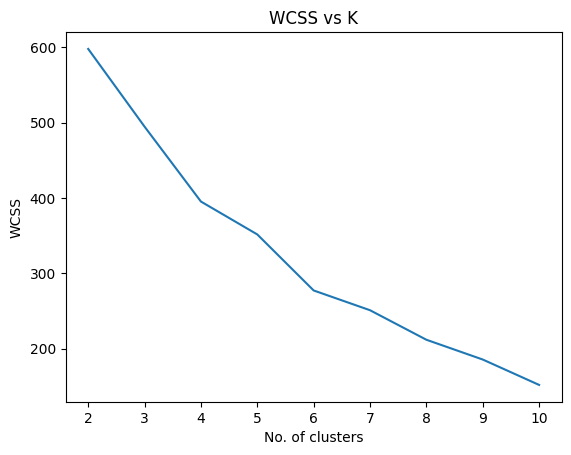

In [29]:
# finding the best k value using elbow method
wcss=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(2,11), wcss)
plt.title("WCSS vs K")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

Here we can see possible best K values can be: 2,4,6. We will take out the best k value by comparing silhoutte score for each value of k

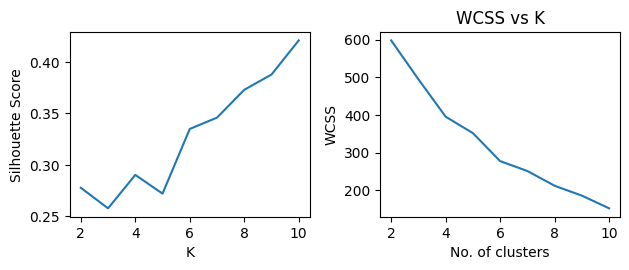

In [30]:
sil_score=[]
for k in range (2,11):
    kmeans=KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels=kmeans.fit_predict(scaled_df)
    sil_score.append(silhouette_score(scaled_df,labels))
plt.subplot(2,2,1)
plt.plot(range(2,11), sil_score)
plt.xlabel('K')
plt.ylabel('Silhouette Score')


plt.subplot(2,2,2)
plt.plot(range(2,11), wcss)
plt.title("WCSS vs K")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")

plt.tight_layout()
plt.show()

In [31]:
kmeans=KMeans(n_clusters=6, init='k-means++')
labels=kmeans.fit_predict(scaled_df)
scaled_df['Clusters']=labels

In [32]:
scaled_df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1.128152,-1.424569,-1.738999,-0.434801,5
1,1.128152,-1.281035,-1.738999,1.195704,5
2,-0.886405,-1.352802,-1.700830,-1.715913,4
3,-0.886405,-1.137502,-1.700830,1.040418,4
4,-0.886405,-0.563369,-1.662660,-0.395980,4


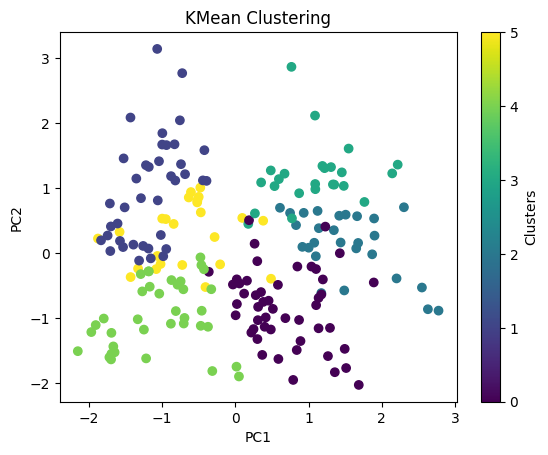

In [34]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
reduced=pca.fit_transform(scaled_df.drop('Clusters', axis=1))
plt.scatter(reduced[:,0], reduced[:,1], c=labels, cmap='viridis')
plt.title('KMean Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Clusters')
plt.show()

# 2. Using Agglomerative Clustering

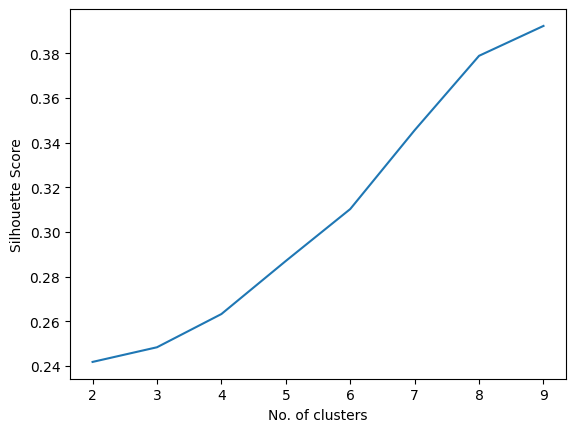

In [36]:
sil_score=[]
for i in range (2,10):
    ac=AgglomerativeClustering(n_clusters=i,metric='euclidean', linkage='ward')
    labels=ac.fit_predict(scaled_df.drop('Clusters',axis=1))
    sil_score.append(silhouette_score(scaled_df.drop('Clusters',axis=1),labels))
plt.plot(range(2,10), sil_score)
plt.xlabel("No. of clusters")
plt.ylabel("Silhouette Score")
plt.show()

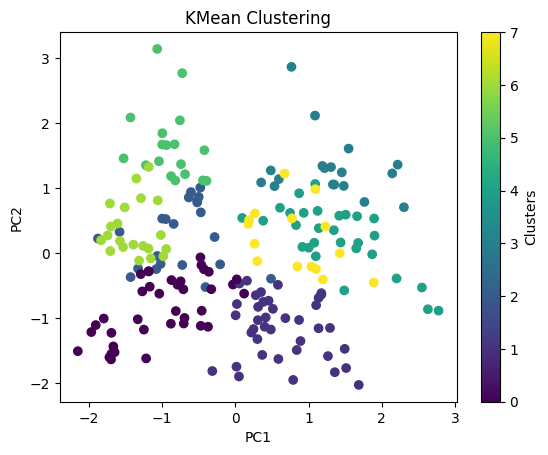

In [37]:
ac=AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
labels=ac.fit_predict(scaled_df.drop('Clusters',axis=1))
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
reduced=pca.fit_transform(scaled_df.drop('Clusters', axis=1))
plt.scatter(reduced[:,0], reduced[:,1], c=labels, cmap='viridis')
plt.title('KMean Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Clusters')
plt.show()